# ADaptive LInear NEurons (ADALINE)
Pubblicato da Bernard Widrow e dal suo studente dottorando Tedd Hoff qualche anno dopo le pubblicazioni di Rosenblatt, introduce il concetto di minimizzazione delle funzioni di costo (o perdita).
Questo fonda le basi per gli algoritmi di ML più avanzati.

La differenza principale della regola di ADALINE è che l'update dei pesi si basa sull'attivazione di una funzione lineare invece che su un gradino unitario come nel caso del percettrone. In Adaline, la funzione $\Phi(z)$ è semplicemente la funzione identità del net input
$$
\Phi(w^T x) = w^T x
$$
<img src="http://rasbt.github.io/mlxtend/user_guide/classifier/Adaline_files/adaline_schematic.png" style="width:350px;"/>

Come mostra l'immagine, Adaline si basa sul confronto della vera classe rispetto all'output *continuo* della funzione (lineare) di attivazione per calcolare l'errore e fare l'update dei pesi.

# Minimizzare le cost functions con il Gradient Descent
Un ingrediente essenziale degli algoritmi di ML è una funzione da ottimizzare nel processo di addestramento. Questa funzione è solitamente una cost function che si vuole minimizzare.
Nel caso di Adaline, possiamo definire la cost function $J$ per i peso come SSE (Sum of Squared Errors) tra i valori calcolati e i valori veri:
$$
J(w) = \frac12\sum_i(y^{(i)}-\Phi(z^{(i)}))^2
$$

> il termine $\frac12$ è aggiunto per rendere il gradiente più facile da derivare

Il vantaggio di una funzione di attivazione lineare rispetto ad una funzione gradino è che è differenziabile.
Nello specifico, questa cost function è convessa, e quindi è possibile utilizzare un algoritmo di ottimizzazione detto **gradient descent** per trovare i pesi che minimizzano la cost function.

<img src="https://miro.medium.com/max/1024/1*G1v2WBigWmNzoMuKOYQV_g.png" style="width:350px;"/>

con questa tecnica è possibile aggiornare i pesi "facendo un passo nella direzione opposta a quella del gradiente" $\nabla J(w)$ della funzione di costo:
$$
w := w+\Delta w
$$
con
$$
\Delta w = -\eta\nabla J(w)
$$

Per calcolare $\nabla J(w)$ basta fare la derivata parziale dalla cost function rispetto ad ogni peso $w_j$:
$$
\frac{\delta J}{\delta w_j} = - \sum_i{(y^{(i)}-\Phi(z^{(i)}))}x_j^{(i)}
$$

e riscrivere:
$$
\Delta w_j=-\eta\frac{\delta J}{\delta w_j}=\eta\sum_i{(y^{(i)}-\Phi(z^{(i)}))}x_j^{(i)}
$$

In questo caso, siccome è possibile **aggiornare tutti i pesi contemporaneamente**:
$$
w = w + \Delta w
$$

Si ricordi che in questo caso, rispetto al percettrone di Rosenblatt, l'output di $\Phi(z)$ è un numero continuo e non un intero (rappresentante l'etichetta della classe); inoltre, l'update dei pesi è aggiornato in base a tutti gli esempi del dataset (invece di aggiornare per ogni esempio), infatti questo algoritmo è anche detto **batch gradient descent**.

In [18]:
class Adaline(object):
    pass

In [19]:
import numpy as np

class AdalineGD(Adaline):
    def __init__(self, eta=0.01, n_iter=50, random_state=50):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state


    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.1,
                              size = 1+ X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

Come fatto con il percettrone, qui si tiene conto dei costi per verificare la convergenza.
Nella pratica, trovare un buon learning rate $\eta$ può richiedere un po' di prove.

> $\eta$ e *learning rate* sono esempi di **iperparametri**, ovvero quei parametri che è possibile modificare "arbitrariamente" per modificare il comportamento di un algoritmo ML

In [20]:
# importiamo gli stessi dati dell'esempio del percettrone di Rosenblatt
import os
import pandas as pd
s = os.path.join("https://archive.ics.uci.edu", "ml", "machine-learning-databases",
                 "iris", "iris.data")
df = pd.read_csv(s, header=None, encoding='utf-8')
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

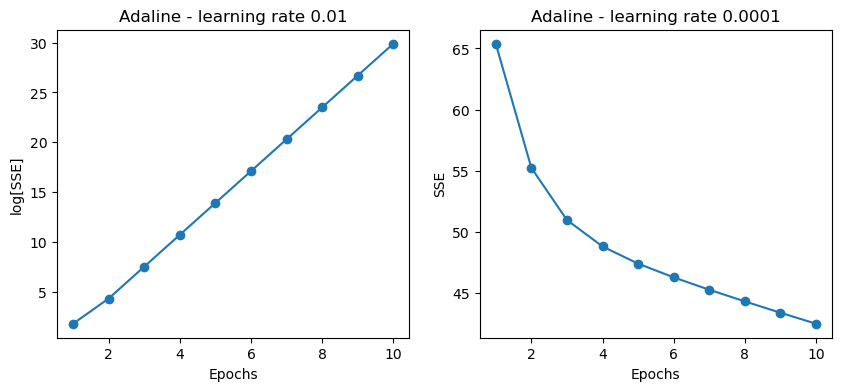

In [21]:
import matplotlib.pyplot as plt
# proviamo ora ad addestrare il modello con due learning rate differenti: 0.01 e 0.0001
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_),
           marker="o")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("log[SSE]")
ax[0].set_title("Adaline - learning rate 0.01")

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_)+1), ada2.cost_,
           marker="o")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("SSE")
ax[1].set_title("Adaline - learning rate 0.0001")
plt.show()

Come possibile osservare dai grafici, un'$\eta$ troppo grande potrebbe portare a superare il minimo globale e, addirittura, a causare un aumento di SSE (sinistra); d'altro canto, un'$\eta$ troppo piccola potrebbe causare un decremento dell'SSE troppo lento, che richiederebbe troppe Epochs per portare al minimo globale.

## Standardizzazione per il gradient descent
Alcuni algoritmi, tra cui il gradient descent, beneficiano dell'utilizzo di tecniche di **feature scaling**.
Nel caso del GD, è possibile usare la standardizzazione, così che ci sia bisogno di meno steps per raggiungere il minimo locale.

$$
x'_j = \frac{x_j-\mu_j}{\sigma_j}
$$

In [22]:
# function to plot decision boundaries for 2-dim dataset
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier: Adaline, resolution=0.02):
    markers = ("s", "x", "o", "^", "v")
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot decision surface
    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], 
                    y=X[y==cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

/var/folders/pf/czktm66518971f6yp3tljtzc0000gn/T/ipykernel_14386/2999869597.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0],


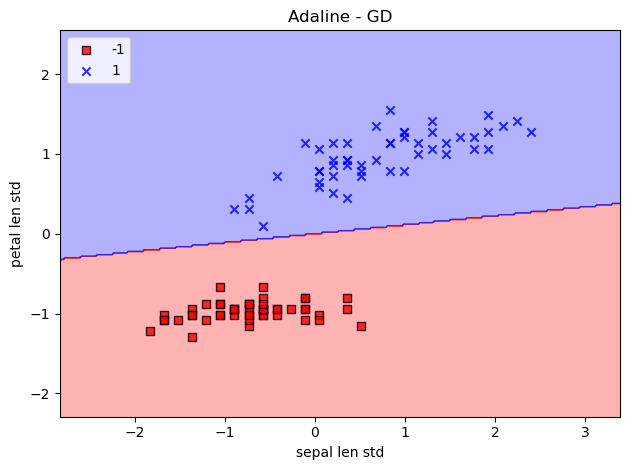

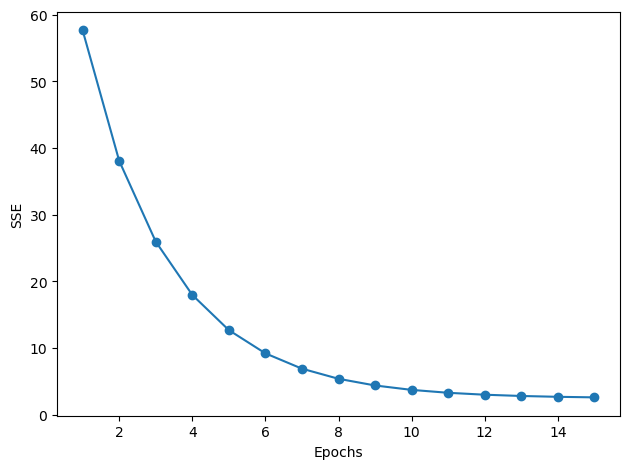

In [23]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

ada_gd = AdalineGD(eta=0.01, n_iter=15).fit(X_std, y)
plot_decision_regions(X_std, y, ada_gd, resolution=0.02)
plt.title("Adaline - GD")
plt.xlabel("sepal len std")
plt.ylabel("petal len std")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_gd.cost_)+1), ada_gd.cost_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("SSE")
plt.tight_layout()
plt.show()

si noti che l'SSE rimane > 0 anche se tutti i sample sono classificati correttamente.

# Stochastic Gradient Descent SGD
Con la tecnica di batch gradient descent appena vista, i pesi si aggiornano in base al gradiente calcolato su tutto il dataset; questo, anche intuitivamente, è un approccio che non è scalabile nel caso di grandi dataset, a causa dei grandi costi che comporterebbe.

Un approccio che in questi casi si preferisce è lo **stochastic gradient descent**, anche detto iterative/online GD.
Invece di aggiornare i pesi in base alla somma degli errori su tutto il dataset, si aggiornano incrementalmente per ogni esempio di training
$$
\eta(y^{(i)}-\Phi(z^{(i)}))x^{(i)}
$$
Tale procedura tende a convergere più velocemente, dato l'aggiornamento più frequente dei pesi, e inoltre tende a non essere tanto soggetto ai minimi locali della funzione, sebbene non raggiunga sempre il minimo globale, ma un'area molto vicina.
> Per ottenere risultati soddisfacenti con l'SGD, è importante mischiare l'ordine dei dati e, inoltre, mischiare il training dataset per ogni epoch.
Infine, solitamente il learning rate $\eta$ nell'SGD non è rappresentato da una costante ma da una variabile che decresce nel tempo
$$
\frac{c_1}{[\text{num of iterations}]+c_2}\;;c_1\,,c_2\text{ costanti}
$$

# Mini batch GD
Il mini batch GD è una tecnica che si pone nel mezzo tra GD e SGD; consiste nell'applicare un batch gradient descent a porzioni piccole di dataset (ad esempio di 32 elementi) alla volta.

In [26]:
import numpy as np

class AdalineSGD(Adaline):
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.w_initialized = False
        self.shuffle = shuffle

    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y): # per ogni training example
                cost.append(self._update_weights(xi, target)) # aggiorna i pesi e aggiungi il costo
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        """fit training data without reinitializing weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size = m + 1)
        self.w_initialized = True
    
    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = (target-output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost 

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

/var/folders/pf/czktm66518971f6yp3tljtzc0000gn/T/ipykernel_14386/2999869597.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0],


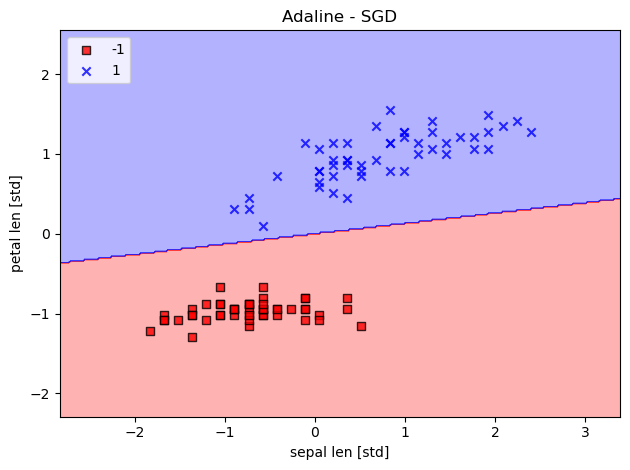

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


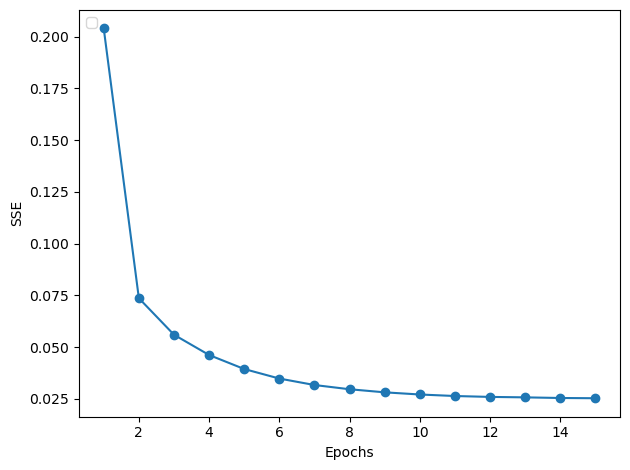

In [27]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, ada_sgd)
plt.title("Adaline - SGD")
plt.xlabel("sepal len [std]")
plt.ylabel("petal len [std]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_sgd.cost_)+1), ada_sgd.cost_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("SSE")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()